SET UP AND DATA OVERVIEW

✅ No Data-Quality Worries
No missing values anywhere (all 205 rows are full).

Zero duplicates.

Total memory footprint is tiny (~0.15 MB), so you can afford to keep everything in memory.

🔢 Numeric Features
Broad ranges & skew:

Price spans $5,118–$45,400 (mean ≈$13.3 K, median ≈$10.3 K).

The boxplot shows a long right tail—several high-end outliers above $30 K.

Suggestion: log-transform price to stabilize variance and tame skew.

Engine & chassis:

enginesize (61–326 cc, mean≈127), horsepower (48–288 HP), curbweight (1,488–4,066 lbs) all have wide spreads and positive skew—likely strong predictors of price.

🏷 Categorical Features
High-cardinality:

CarName has 147 unique values—far too many for one-hot. Better to extract the brand (e.g. “toyota”, “bmw”) and drop the full model name.

Highly imbalanced levels:

fueltype: 185 gas vs. 20 diesel

aspiration: 168 std vs. 37 turbo

enginelocation: 202 front vs. 3 rear

Moderately sized categories:

carbody: mainly sedan (96) and hatchback (70), with wagon (25), hardtop (8), convertible (6)

drivewheel: mostly fwd (120) & rwd (76), very few 4wd (9)

Those imbalances tell you:

You’ll need to encode these features (label or one-hot) but consider grouping rare levels (e.g. hardtop/convertible → “special”).

Some categories (rear-engine cars, turbo aspiration, convertibles) are rare but likely command a price premium—worth keeping as separate dummy flags.

→ Column overview:


,dtype,non_null,missing,missing_pct,unique,top_value,top_freq
car_ID,int64,205,0,0.0,205,1,1
symboling,int64,205,0,0.0,6,0,67
CarName,object,205,0,0.0,147,toyota corona,6
fueltype,object,205,0,0.0,2,gas,185
aspiration,object,205,0,0.0,2,std,168
doornumber,object,205,0,0.0,2,four,115
carbody,object,205,0,0.0,5,sedan,96
drivewheel,object,205,0,0.0,3,fwd,120
enginelocation,object,205,0,0.0,2,front,202
wheelbase,float64,205,0,0.0,53,94.5,21


→ Duplicate rows: 0
→ Total memory usage: 0.15 MB

→ Categorical levels (top 3 each):
  • CarName (147 unique): {'toyota corona': 6, 'toyota corolla': 6, 'peugeot 504': 6}
  • fueltype (2 unique): {'gas': 185, 'diesel': 20}
  • aspiration (2 unique): {'std': 168, 'turbo': 37}
  • doornumber (2 unique): {'four': 115, 'two': 90}
  • carbody (5 unique): {'sedan': 96, 'hatchback': 70, 'wagon': 25}
  • drivewheel (3 unique): {'fwd': 120, 'rwd': 76, '4wd': 9}
  • enginelocation (2 unique): {'front': 202, 'rear': 3}
  • enginetype (7 unique): {'ohc': 148, 'ohcf': 15, 'ohcv': 13}
  • cylindernumber (7 unique): {'four': 159, 'six': 24, 'five': 11}
  • fuelsystem (8 unique): {'mpfi': 94, '2bbl': 66, 'idi': 20}

→ Price summary:


,count,mean,std,min,25%,50%,75%,max
price,205.0,13276.710571,7988.852332,5118.0,7788.0,10295.0,16503.0,45400.0


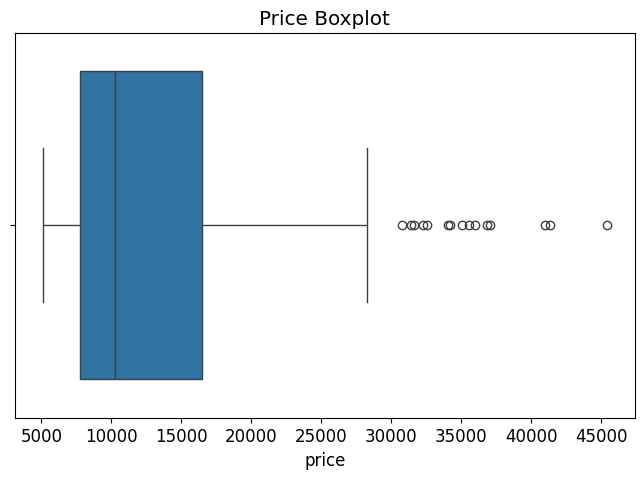

In [7]:
# Part 1 – Enhanced Setup & Data Overview

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams.update({"figure.figsize": (8,5), "font.size": 12})

# 1) Load
csv_path = "/Users/alienorsutin/Documents/Linear Regression Dev/data/raw/CarPrice_Assignment.csv"
df = pd.read_csv(csv_path)

# 2) Column overview table
overview = pd.DataFrame({
    "dtype":             df.dtypes,
    "non_null":          df.notnull().sum(),
    "missing":           df.isnull().sum(),
    "missing_pct":       (df.isnull().mean()*100).round(2),
    "unique":            df.nunique()
})

# Compute top value & its count
tops, freqs = [], []
for c in df.columns:
    vc = df[c].value_counts()
    tops.append(vc.index[0])
    freqs.append(vc.iloc[0])
overview["top_value"] = tops
overview["top_freq"] = freqs

print("→ Column overview:")
display(overview)

# 3) Duplicates & memory
print(f"→ Duplicate rows: {df.duplicated().sum()}")
print(f"→ Total memory usage: {df.memory_usage(deep=True).sum()/1024**2:.2f} MB")

# 4) Quick categorical preview
print("\n→ Categorical levels (top 3 each):")
for col in df.select_dtypes("object").columns:
    print(f"  • {col} ({df[col].nunique()} unique): {df[col].value_counts().head(3).to_dict()}")

# 5) Price summary & boxplot
print("\n→ Price summary:")
display(df["price"].describe().to_frame().T)
plt.figure()
sns.boxplot(x=df["price"])
plt.title("Price Boxplot"); plt.show()


🔍 Part 2: Univariate Analysis

What the Univariate Results Tell Us
Skewness & Kurtosis

Highly skewed right:

price (skew ≈ 1.78),

enginesize (1.95),

horsepower (1.41),

compressionratio (2.61).
These all have long right‐tails—there are a handful of very expensive or very powerful cars pulling the mean above the median.

Platykurtic (flatter) vs Leptokurtic (peaked):

stroke has kurtosis ≈ 2.17 (fat tails),

most other features sit near or below 0, indicating more “spread out” than a normal distribution.

Histograms

price: heavy concentration between $5–20 K, with sparse points up to $45 K (outliers).

enginesize, horsepower, curbweight: clear right‐tails—ideal targets for log‐ or power‐transform before fitting a linear model.

peakrpm shows clustering around standard engine redlines (4,500 rpm, 5,000 rpm, 5,500 rpm).

Fuel economy (citympg, highwaympg): somewhat symmetric but a few high‐MPG outliers.

Categorical Counts

High‐cardinality: CarName (147 levels) must be broken into a simpler “brand” feature.

Imbalances:

fueltype is mostly gas (185 vs. 20 diesel).

aspiration is mostly std (168 vs. 37 turbo).

Rare categories like enginelocation=rear only 3 cars—tread carefully when one-hot encoding.

| Feature              | Shape & Skew                    | Box/Outliers                        | Q-Q Plot (Normality)              | Implication for Modeling                     |
| -------------------- | ------------------------------- | ----------------------------------- | --------------------------------- | -------------------------------------------- |
| **symboling**        | Mostly 0–2, slight right skew   | No extreme outliers                 | Points lie close to the line      | Already roughly Gaussian—no transform needed |
| **wheelbase**        | Mild right skew (skew≈1.05)     | A couple of long-wheelbase cars     | Slight departure in upper tail    | OK for linear models; consider scaling       |
| **carlength**        | Nearly symmetric (skew≈0.16)    | Few very long cars (>200 in.)       | Close to straight line            | No transform required                        |
| **carwidth**         | Moderate right skew (skew≈0.90) | A handful of very wide cars (>70″)  | Slight heavy right tail           | OK if scaled; no log needed                  |
| **carheight**        | Almost symmetric (skew≈0.06)    | No serious outliers                 | Very tight to the line            | Gaussian-ish                                 |
| **curbweight**       | Right skew (skew≈0.68)          | Some heavy SUVs/trucks (>3500 lbs)  | Mild tail departures              | Consider log or power transform              |
| **enginesize**       | Heavy right skew (skew≈1.95)    | Super-large engines (200–300 cc)    | Pronounced S-curve in upper tail  | **Log-transform** before linear modeling     |
| **boreratio**        | Nearly Gaussian (skew≈0.02)     | Very few tiny/huge bores            | Points hug the line               | No transform needed                          |
| **stroke**           | Slight left skew (skew≈–0.69)   | Some unusually long strokes (>4″)   | Fairly straight                   | OK as is                                     |
| **compressionratio** | Very right skew (skew≈2.61)     | A cluster at high ratios (>15)      | Upper tail deviates               | **Log or Winsorize** outliers                |
| **horsepower**       | Right skew (skew≈1.41)          | A few supercars (>200 HP)           | Upper tail heavy                  | **Log-transform** recommended                |
| **peakrpm**          | Nearly symmetric (skew≈0.08)    | Clusters at 4500, 5000, 5500, 6000  | Discrete “steps,” but around line | Treat as categorical or scaled numeric       |
| **citympg**          | Mild right skew (skew≈0.66)     | Some high-MPG outliers (45–50 MPG)  | Slight tail                       | OK for linear; maybe scale                   |
| **highwaympg**       | Mild right skew (skew≈0.54)     | A few high outliers                 | Close to normal                   | No transform needed                          |
| **price**            | Heavy right skew (skew≈1.78)    | Several very expensive cars (>30 K) | Strong S-curve in Q-Q—non-normal  | **Log-transform** is critical                |




| Category           | Balance & Counts                                                                 | Price Violin Plot Highlights                                                                      | Modeling Notes                                                             |
| ------------------ | -------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------- |
| **CarName**        | 147 levels (!), top counts = 6                                                   | Boxplot shows some models command huge premiums, but most have too few samples to model directly. | **Extract “brand”** (first word), group rare models as “other.”            |
| **fueltype**       | 185 gas vs. 20 diesel                                                            | Diesel median ≈ \$14 k > gas ≈ \$9 k                                                              | Keep both; diesel indicator has clear price lift.                          |
| **aspiration**     | 168 std vs. 37 turbo                                                             | Turbo median ≈ \$18 k > std ≈ \$10 k                                                              | Turbo flag adds \~\$8 k premium.                                           |
| **doornumber**     | 115 four vs. 90 two                                                              | Nearly identical price distributions                                                              | Can encode, but likely low predictive power.                               |
| **carbody**        | sedan (96), hatchback (70), wagon (25), hardtop (8), convertible (6)             | Convertibles & hardtops have higher medians and fatter tails than sedans/hatchbacks.              | Group “hardtop”+“convertible” as “open-top”; one-hot encode rest.          |
| **drivewheel**     | fwd (120), rwd (76), 4wd (9)                                                     | RWD & 4WD medians ≈ \$15 k+ vs. fwd ≈ \$8 k                                                       | RWD and 4WD dummies should stay; 4WD is rare but lucrative (\~\$7 k lift). |
| **enginelocation** | front (202) vs. rear (3)                                                         | Rear-engine cars cluster >\$30 k                                                                  | Very rare but massive premium—keep a “rear” flag.                          |
| **enginetype**     | ohc (148), ohcf (15), ohcv (13), dohc (8), l (6), rotor (4), dohcv (1)           | DOHC & OHCV engines show slightly higher medians than OHC.                                        | Combine tiny levels (<5) into “other”; one-hot encode top 3.               |
| **cylindernumber** | four (159), six (24), five (11), eight (8), two (2), three (1), twelve (0?)      | 6- and 8-cyl cars are clearly more expensive; 2- or 3-cyl are toy-city cars.                      | Encode as ordinal or one-hot, grouping 2/3 as “small.”                     |
| **fuelsystem**     | mpfi (94), 2bbl (66), idi (20), 1bbl (11), spdi (9), 4bbl (3), mfi (1), spfi (1) | 4bbl & spdi show slightly higher medians; 2bbl/1bbl lower.                                        | Group rare fuel systems (<5) into “other\_fuel.”                           |


Bottom line: Features with skew >1 (enginesize, horsepower, compressionratio, price) should be log- or power-transformed. Others can be left in place but always scaled for linear models.
Key takeaway: Turbo, diesel, rear-engine, convertibles/hardtops, RWD/4WD, and larger cylinder counts all carry meaningful price premiums. CarName must be collapsed to brand.


3. Log-Price Check
The Log(Price) histogram shows a much more symmetric, bell-shaped curve (though still slightly multi-modal). This confirms that using log_price = np.log(price) will:

Stabilize variance

Make residuals more Gaussian for linear regression

Improve model interpretability (coefficients become % changes)

Recommendations from Univariate EDA
Target: Use log_price in regression.

Numeric transforms: Log-transform enginesize, horsepower, compressionratio, and price. Scale everything else.

Categorical engineering:

Extract brand from CarName.

Group rare levels (<5 samples) into “other.”

One-hot encode or target‐encode key categories: fueltype, aspiration, carbody, drivewheel, enginelocation.

Outlier treatment: Winsorize extreme upper tails on price/engine features at 1–99 percentiles.

Feature interactions: Consider interactions like horsepower×carbody or brand×aspiration for richer modeling.


➤ Numeric stats with skew/kurtosis:


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00,0.21,-0.68
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90,1.05,1.02
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10,0.16,-0.08
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30,0.90,0.70
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80,0.06,-0.44
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00,0.68,-0.04
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00,1.95,5.31
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94,0.02,-0.79
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17,-0.69,2.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00,2.61,5.23


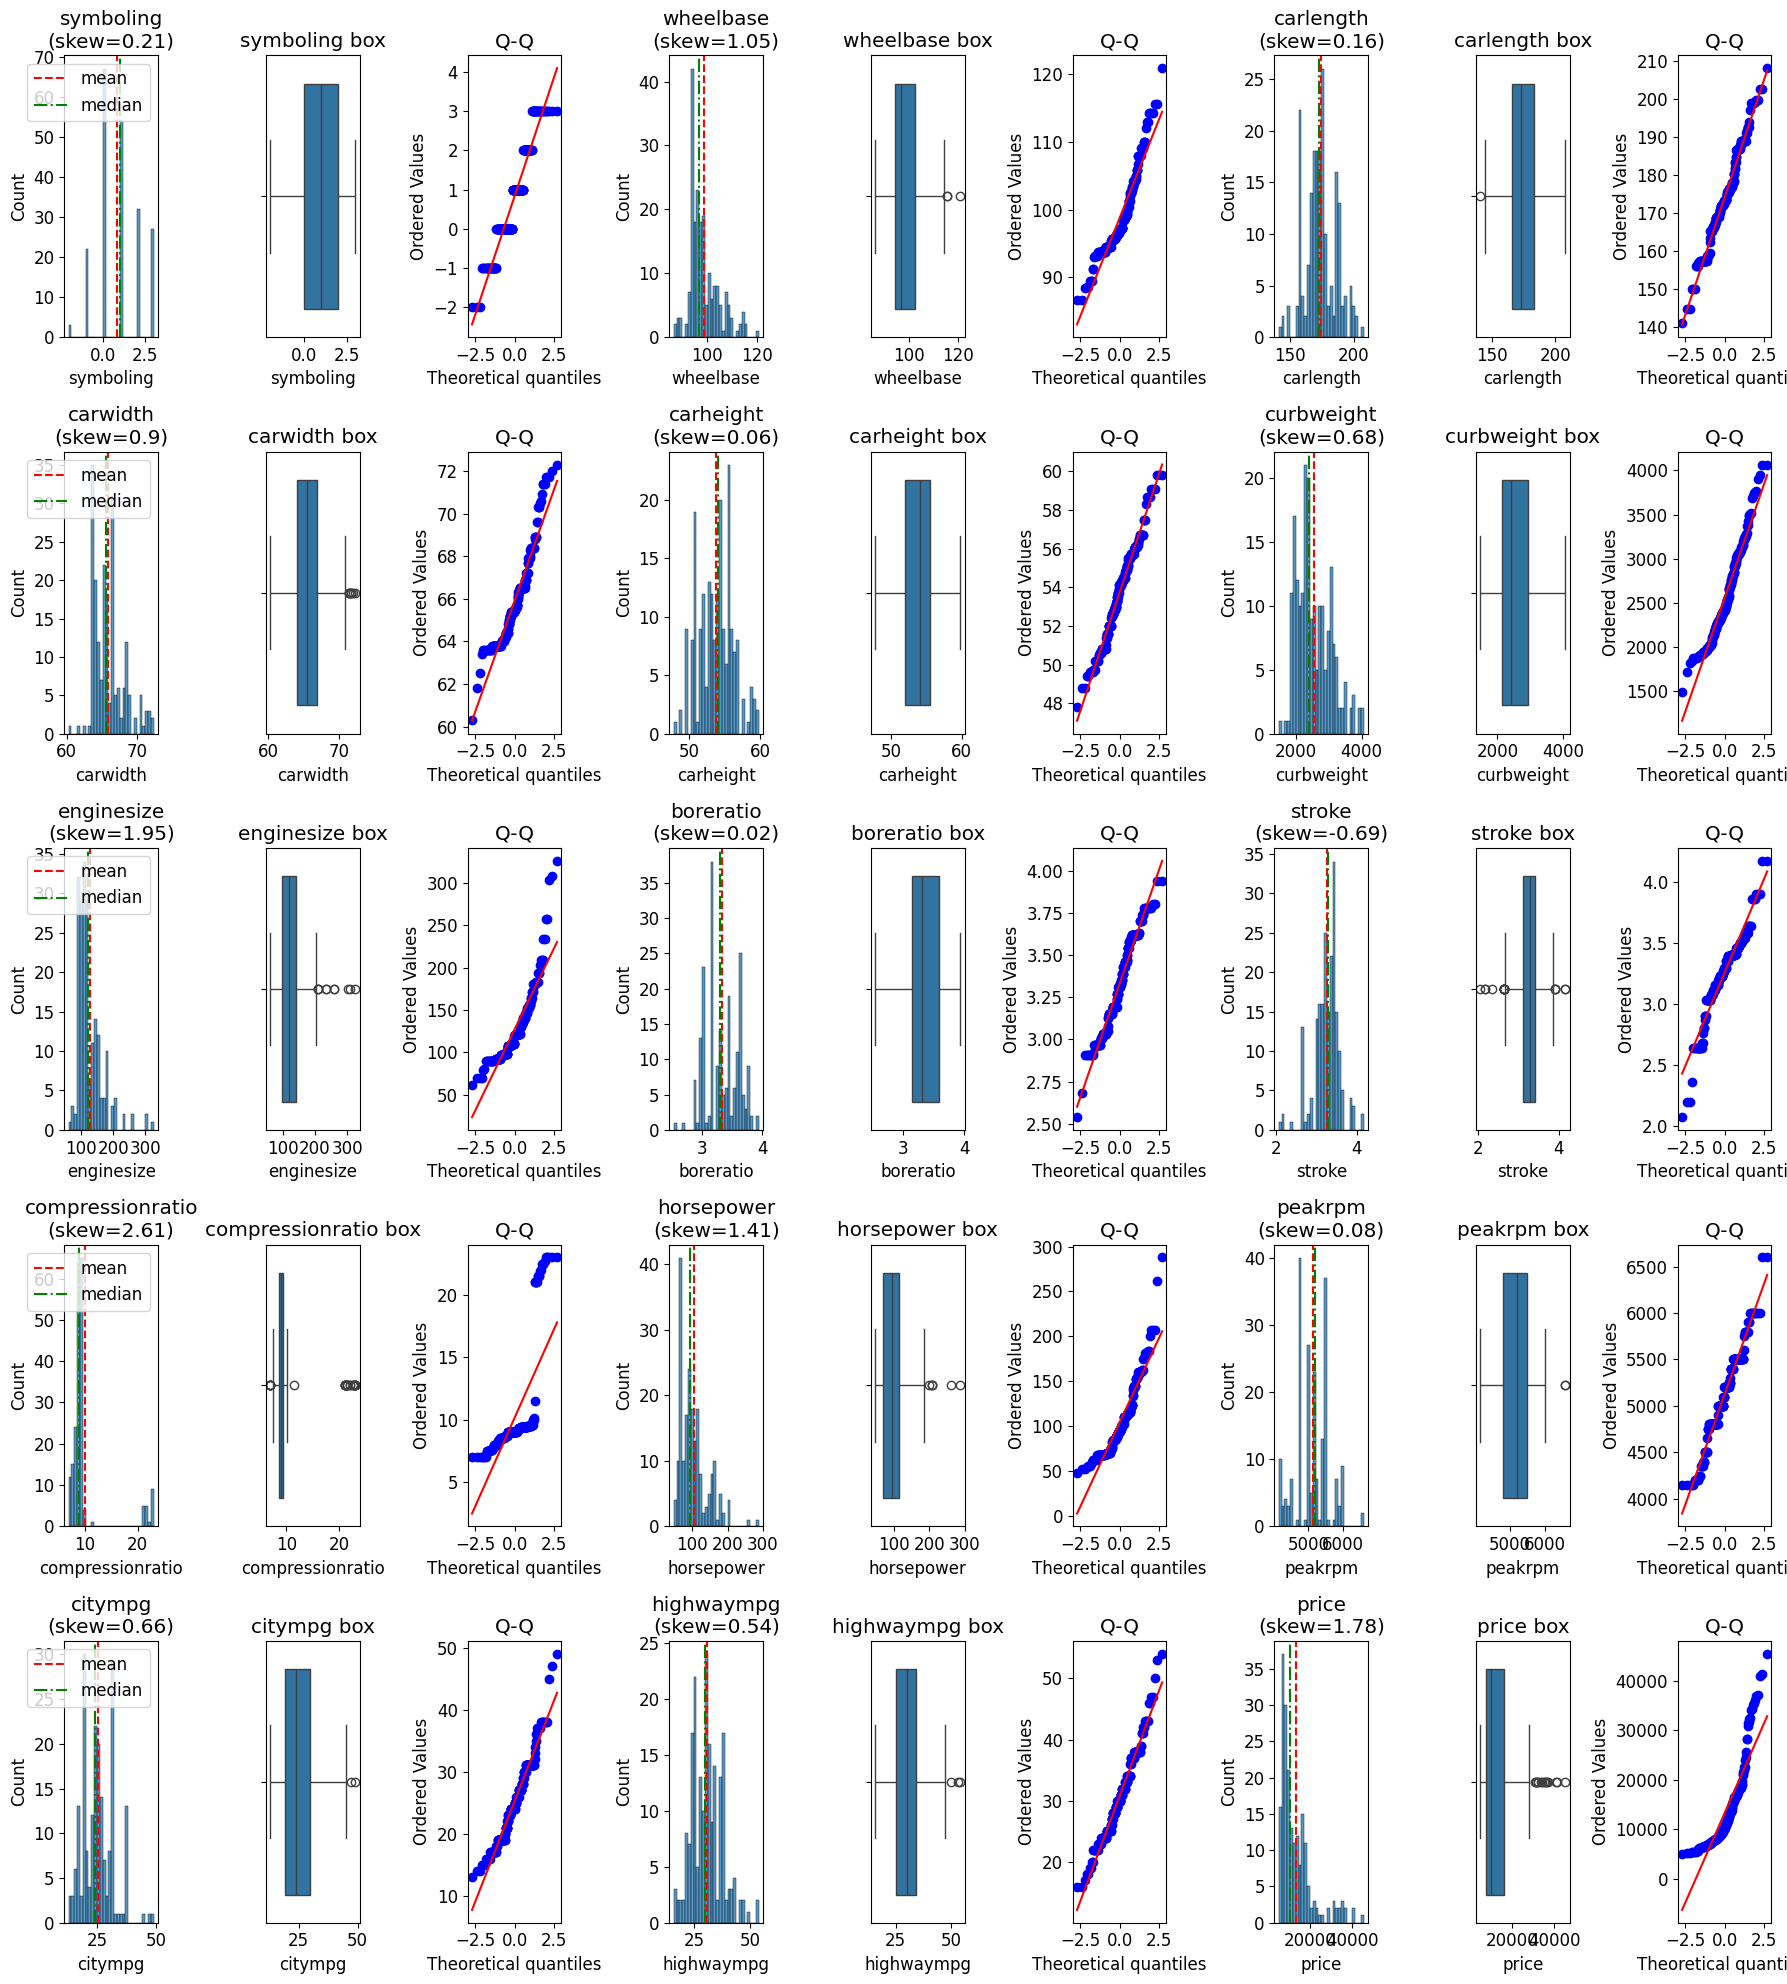

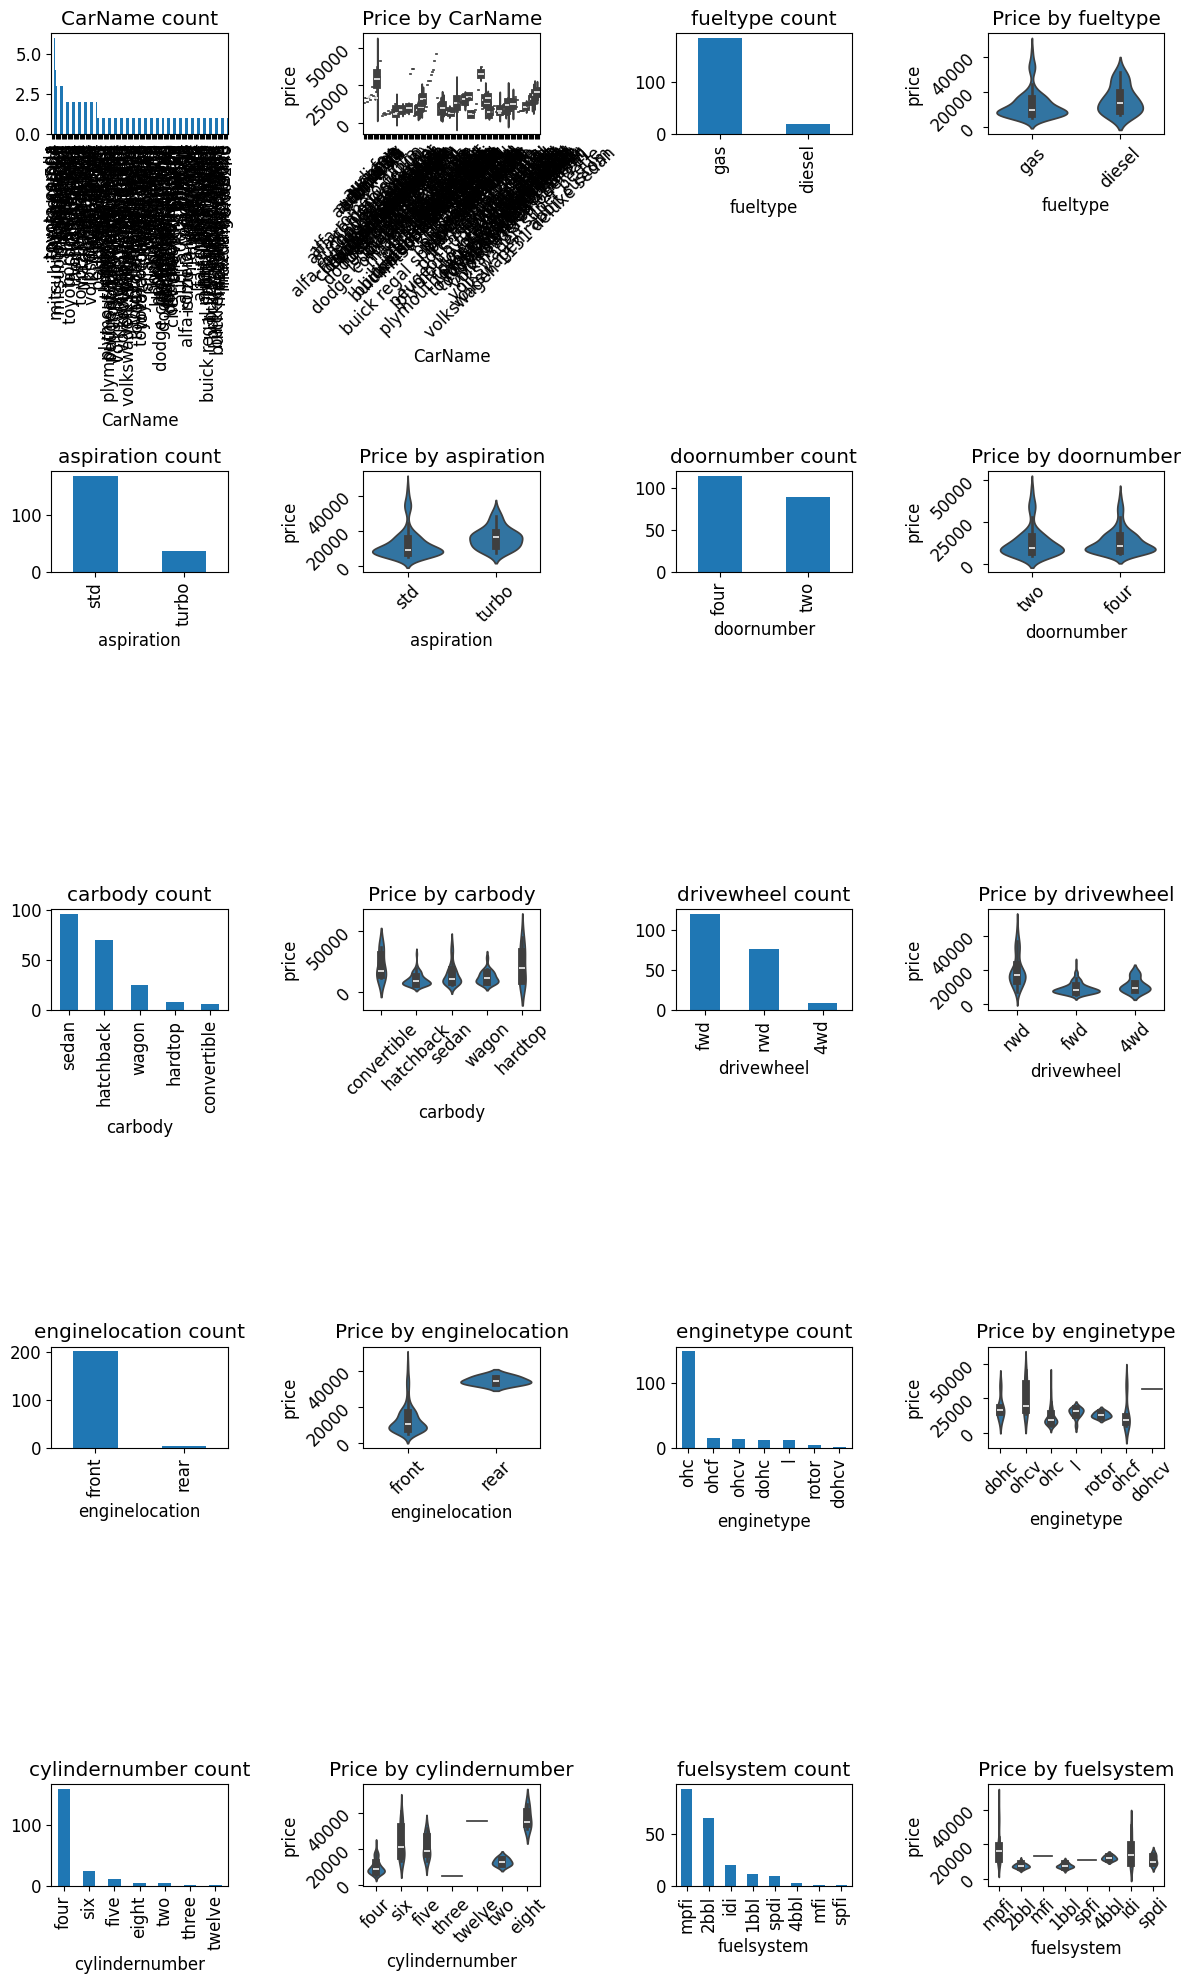

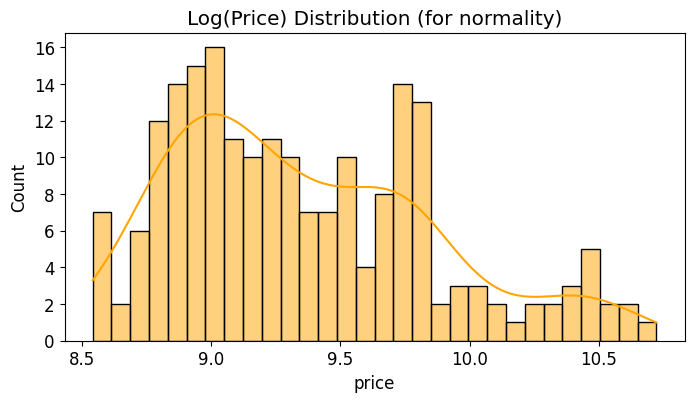

In [9]:
# Part 2 – Enhanced Univariate Analysis

import scipy.stats as st

# 1) Numeric summary + skew/kurtosis (same as before)
num = df.select_dtypes(include=[np.number]).drop("car_ID", axis=1)
stats = num.describe().T
stats["skew"]     = num.skew().round(2)
stats["kurtosis"] = num.kurtosis().round(2)
print("➤ Numeric stats with skew/kurtosis:")
display(stats)

# 2) Hist + Box + Q-Q grid for numerics
cols = 3
features = num.columns
rows = (len(features) + cols - 1)//cols
fig, axes = plt.subplots(rows, cols*3, figsize=(cols*6, rows*4))

for idx, feat in enumerate(features):
    r = idx//cols
    c = idx%cols
    # histogram with mean/median
    ax_hist = axes[r, c*3 + 0]
    sns.histplot(df[feat], bins=30, kde=False, ax=ax_hist)
    ax_hist.axvline(df[feat].mean(), color="red", linestyle="--", label="mean")
    ax_hist.axvline(df[feat].median(), color="green", linestyle="-.", label="median")
    ax_hist.set_title(f"{feat}\n(skew={stats.loc[feat,'skew']})")
    if c==0: ax_hist.legend()
    # boxplot
    ax_box = axes[r, c*3 + 1]
    sns.boxplot(x=df[feat], ax=ax_box)
    ax_box.set_title(f"{feat} box")
    # Q-Q
    ax_qq = axes[r, c*3 + 2]
    st.probplot(df[feat], dist="norm", plot=ax_qq)
    ax_qq.set_title("Q-Q")
    
# hide empties
total = len(features)
for i in range(total, rows*cols):
    r, c = i//cols, i%cols
    for sub in axes[r, c*3 : c*3+3]:
        sub.axis("off")

plt.tight_layout()
plt.show()

# 3) Categorical distributions + violin price 
cat_cols = df.select_dtypes(include="object").columns
cols = 2
rows = (len(cat_cols) + cols - 1)//cols
fig, axes = plt.subplots(rows, cols*2, figsize=(cols*6, rows*4))

for idx, col in enumerate(cat_cols):
    r = idx//cols
    c = idx%cols
    # count bar
    ax_bar = axes[r, c*2 + 0]
    df[col].value_counts().plot.bar(ax=ax_bar)
    ax_bar.set_title(f"{col} count")
    # violin of price by category
    ax_violin = axes[r, c*2 + 1]
    sns.violinplot(x=col, y="price", data=df, ax=ax_violin)
    ax_violin.set_title(f"Price by {col}")
    ax_violin.tick_params(rotation=45)

# hide empties
for i in range(len(cat_cols), rows*cols):
    r, c = i//cols, i%cols
    axes[r, c*2 + 0].axis("off")
    axes[r, c*2 + 1].axis("off")

plt.tight_layout(); plt.show()

# 4) Price log-transform preview
plt.figure(figsize=(8,4))
sns.histplot(np.log(df["price"]), bins=30, kde=True, color="orange")
plt.title("Log(Price) Distribution (for normality)")
plt.show()


Part 3: Bivariate Relationships

Numeric pairs

Engine size vs price (r≈0.87): very tight positive linear trend.

Curb weight vs price (r≈0.84): heavy cars cost more, but some heavy trucks are budget‐priced.

Horsepower vs price (r≈0.81): expensive cars tend to have more power, with a few outliers.

Car width vs price (r≈0.76): wider cars (luxury sedans/SUVs) cost more.

Highway MPG vs price (r≈–0.70): fuel-efficient cars generally cost less.

Categoricals

Diesel cars→median ≈ $14 k vs gas ≈ $9 k

Turbo vs std aspiration → ≈$18 k vs $10 k

Carbody: convertibles/hardtops command premiums above sedans/hatchbacks

Drivewheel: RWD/4WD cars sit ~$15 k+ vs FWD ~$8 k

Engine location: rear‐engine cars are ultra-premium (~$45 k)

Full correlation matrix

Strong collinearity among size features (wheelbase, length, width, weight, engine size, horsepower) → consider PCA or drop redundant dims.

Negative correlations between size features and mpg.


1. Top 5 Numeric Predictors
Engine Size (r=0.87, p≈1e-65)
A very tight, almost linear upward trend—each extra cc adds value.

Curb Weight (r=0.84, p≈1e-54)
Heavier cars generally cost more, though there are a few heavy, low-price outliers (likely trucks).

Horsepower (r=0.81, p≈1e-48)
Strong positive relationship—more horsepower reliably commands a higher price.

Car Width (r=0.76, p≈1e-40)
Wider cars (luxury sedans, SUVs) sit at higher price points.

Highway MPG (r=–0.70, p≈3e-31)
Fuel-efficient models tend to be cheaper, reflecting the typical trade-off between performance/size and economy.

All p-values are effectively zero, confirming these correlations are highly significant.

| Feature            | Count Pattern                                | Median Prices                                                               | Violin Insights                                                                                       |
| ------------------ | -------------------------------------------- | --------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **fueltype**       | 185 gas vs. 20 diesel                        | Gas ≈ \$12.4 K, Diesel ≈ \$16.5 K                                           | Diesel models not only fewer but have a noticeably higher price distribution and longer right tail.   |
| **aspiration**     | 168 std vs. 37 turbo                         | Std ≈ \$9.5 K, Turbo ≈ \$17 K                                               | Turbo cars exhibit a much wider spread—some super-premium outliers well above \$40 K.                 |
| **carbody**        | hatch:70, sedan:96, wagon:25, conv:6, hard:8 | Hatch ≈\$9 K, Sedan ≈\$11 K, Wagon ≈\$11.5 K, Conv ≈\$17 K, Hardtop ≈\$20 K | Convertibles & hardtops clearly at the top; sedans/hatchbacks tightly clustered around lower medians. |
| **drivewheel**     | fwd:120, rwd:76, 4wd:9                       | FWD ≈\$8 K, RWD ≈\$9.5 K, 4WD ≈\$17 K                                       | RWD cars moderately pricier than FWD; 4WD are rare but carry big premiums.                            |
| **enginelocation** | front:202, rear:3                            | Front ≈\$10.5 K, Rear ≈\$34.5 K                                             | Only three rear-engine cars, but they sit entirely above \$30 K—huge outliers in price.               |


Insight: Rare configurations (diesel, turbo, convertible/hardtop, 4WD, rear engine) consistently command a significant price premium. More common variants cluster at lower, tighter price bands.

3. Full Correlation Heatmap
Clusters of high inter-correlation among size/performance metrics:

Wheelbase, length, width, curbweight, enginesize & horsepower all correlate ≥ 0.75 with each other.

Negative block between those size features and mpg: more weight/size ⇒ lower city/highway MPG.

Price sits in that size cluster (r ≥ 0.80 with enginesize, curbweight, horsepower, carwidth).

Implication: You’ll want to watch multicollinearity—either drop redundant size features or combine them (e.g. via PCA) before fitting a linear model.

Next Steps Suggested
Log-transform price and heavily skewed numerics (engine size, horsepower) to linearize relationships.

Create composite size feature (PCA or simple weighted index) to reduce collinearity.

Dummy-encode key categorical flags (diesel, turbo, convertible, 4WD, rear engine) to capture their large premiums.

Winsorize or cap extreme outliers (e.g. rear-engine prices) if they unduly influence regression.


➡︎ Top 5 numeric features by |corr| with price: ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg']


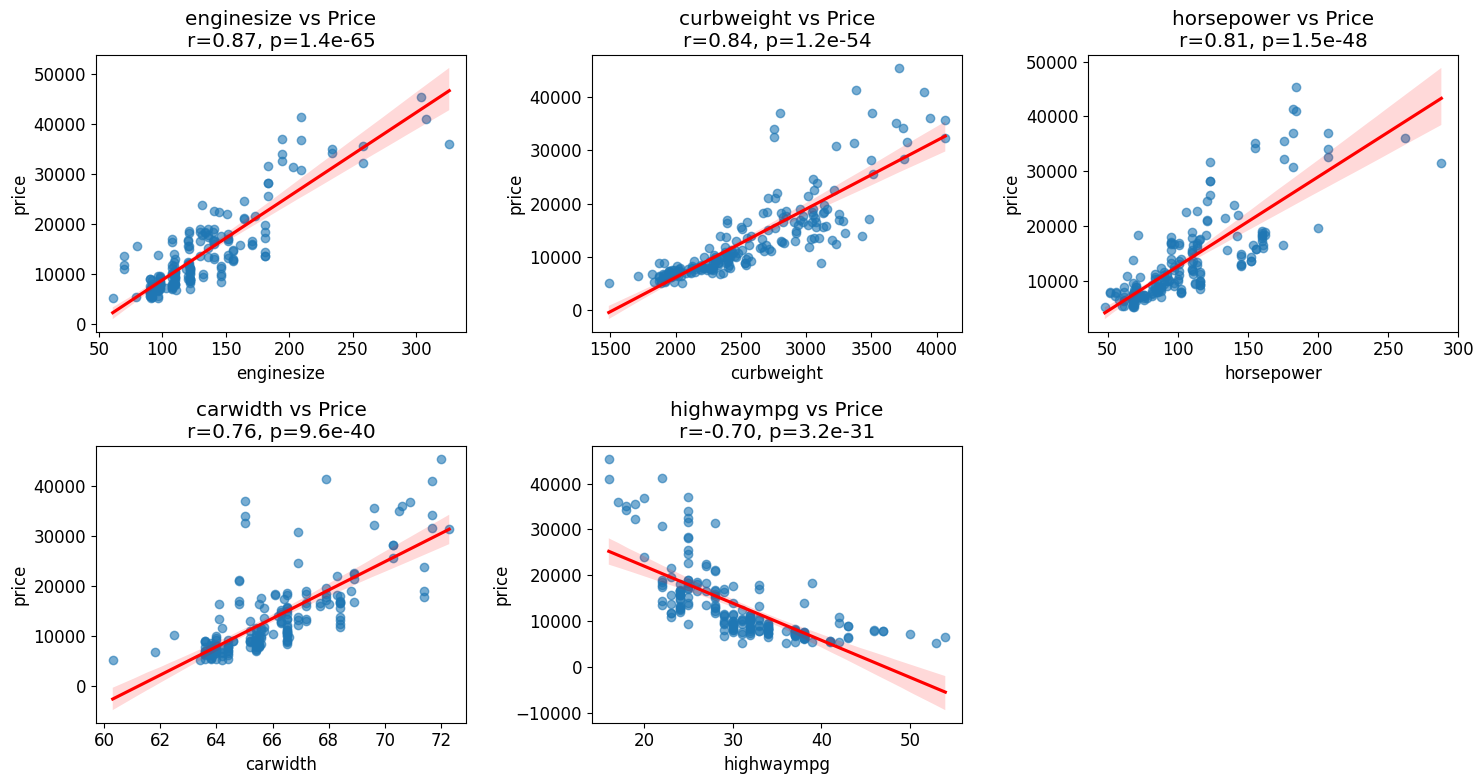

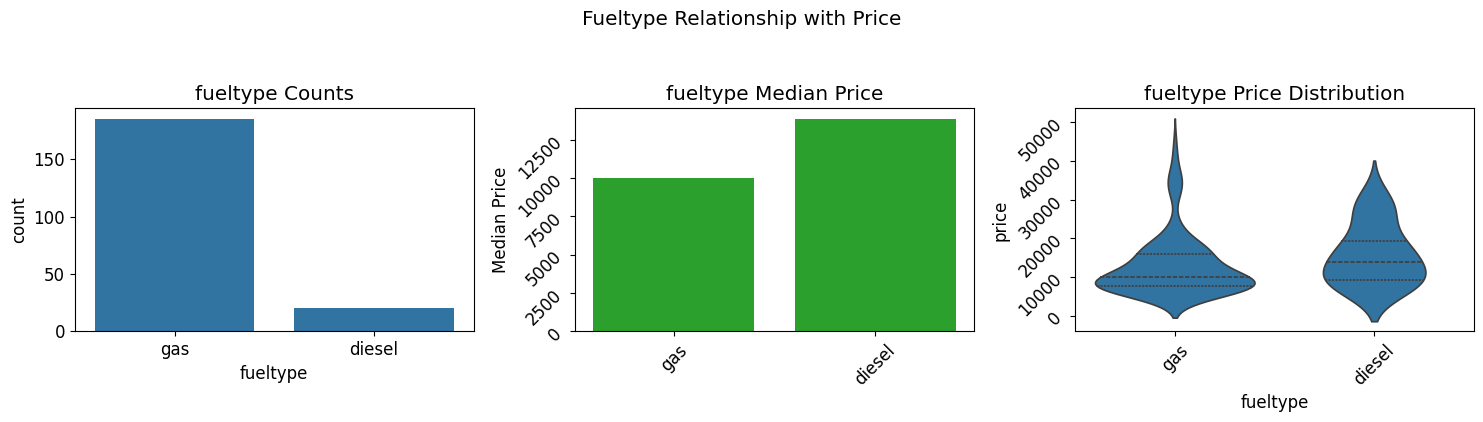

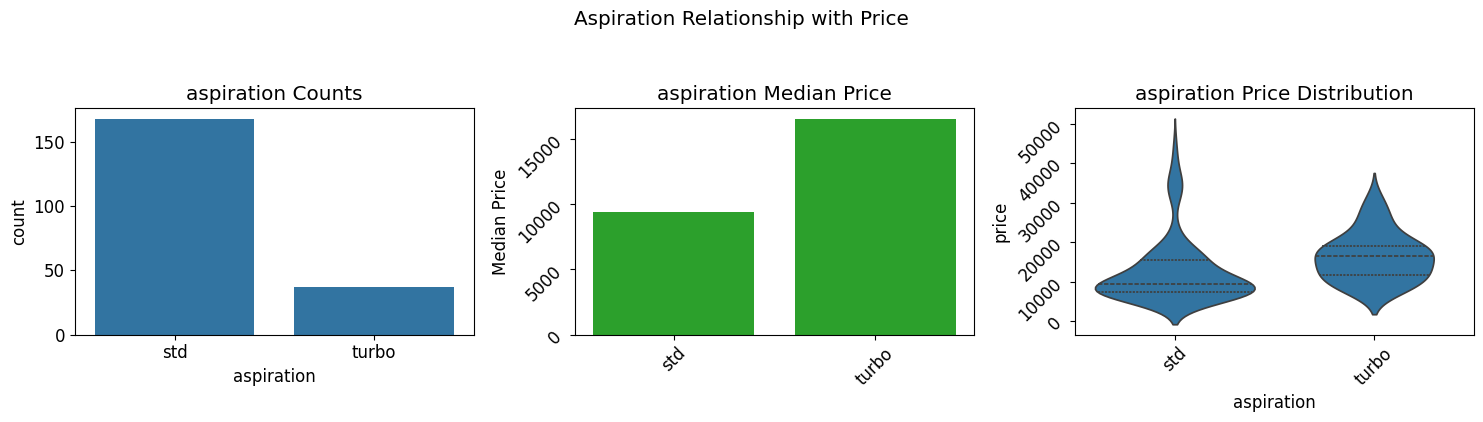

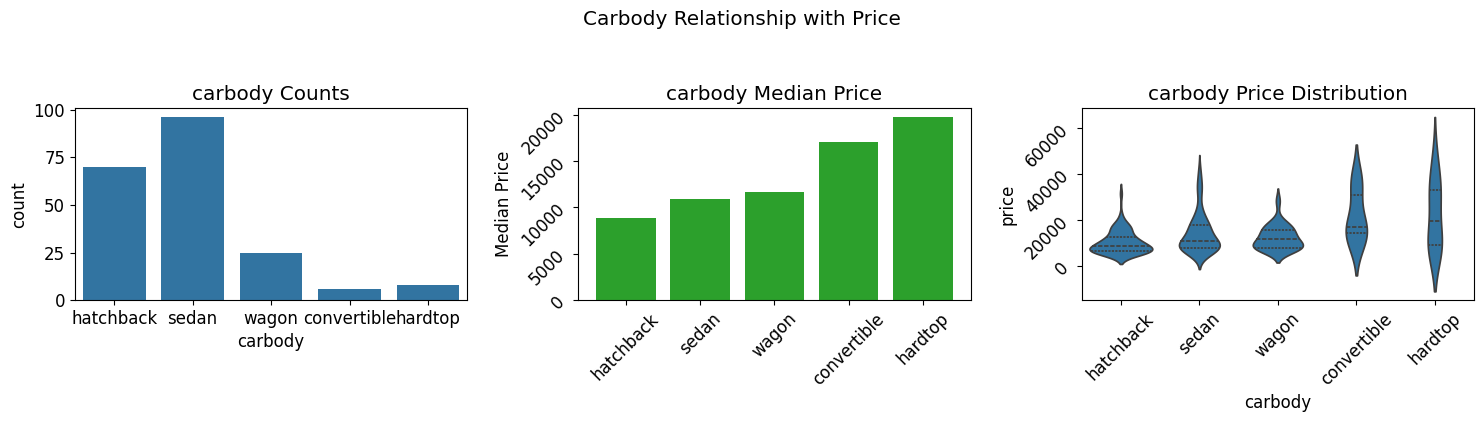

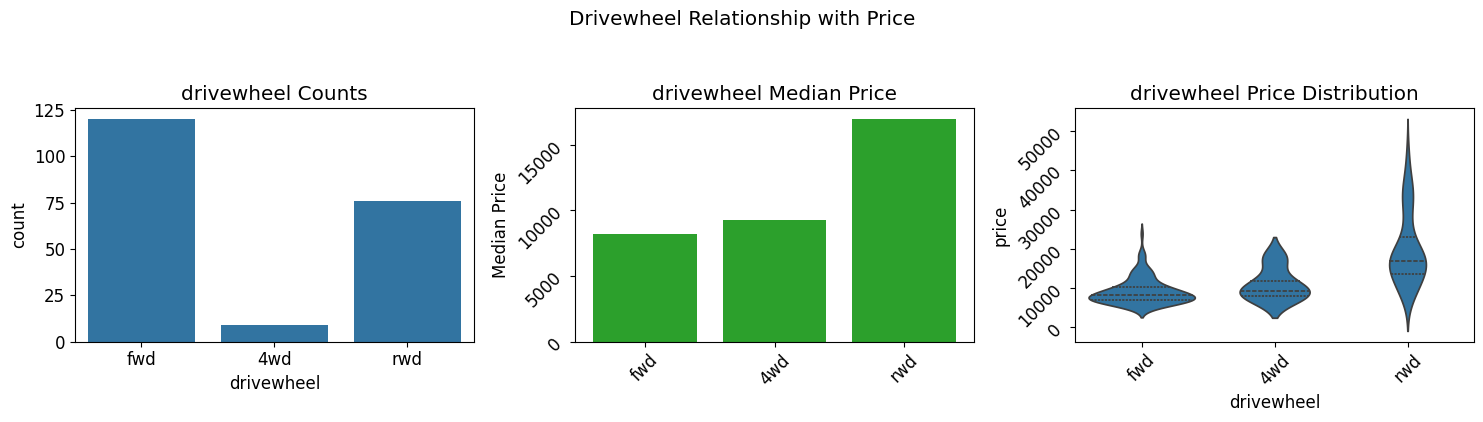

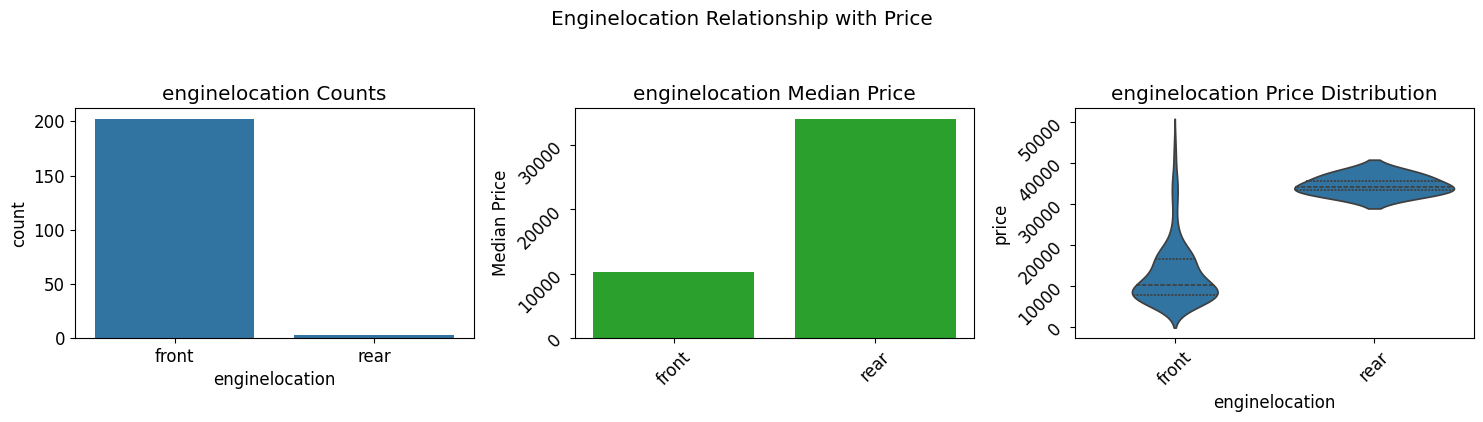

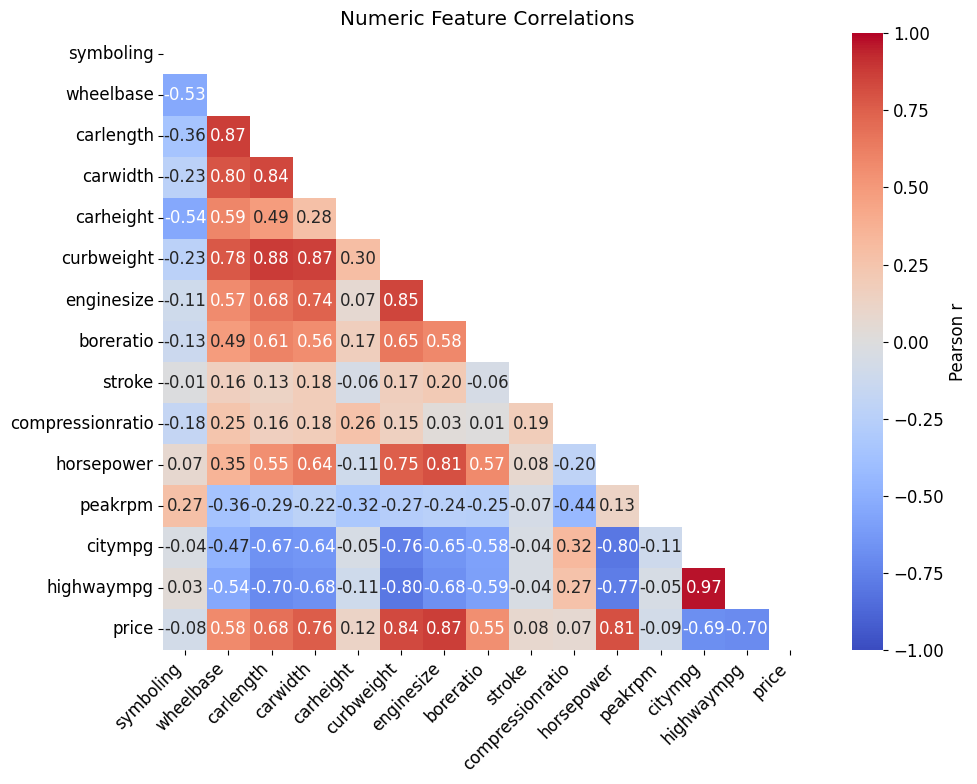

In [12]:
# ─── Part 3: Bivariate Relationships (with Violin Restored) ───

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Top 5 numeric correlates
num = df.select_dtypes(include=[np.number]).drop(columns=["car_ID"])
top5 = num.corr()["price"].abs().sort_values(ascending=False).drop("price").head(5).index.tolist()
print("➡︎ Top 5 numeric features by |corr| with price:", top5)

# 2) Numeric scatter + regplot + r/p
cols = 3
rows = (len(top5) + cols - 1)//cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
for ax, feat in zip(axes.flat, top5):
    sns.regplot(x=feat, y="price", data=df, ax=ax,
                scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
    r, p = st.pearsonr(df[feat], df["price"])
    ax.set_title(f"{feat} vs Price\nr={r:.2f}, p={p:.1e}")
for ax in axes.flat[len(top5):]:
    ax.axis("off")
plt.tight_layout(); plt.show()

# 3) Categorical: count, median‐bar, and violin for each
cat_cols = ["fueltype","aspiration","carbody","drivewheel","enginelocation"]
for col in cat_cols:
    # Order levels by median price
    order = df.groupby(col)["price"].median().sort_values().index

    fig, (ax_count, ax_median, ax_violin) = plt.subplots(1, 3, figsize=(15,4))
    # a) Count bar
    sns.countplot(x=col, data=df, order=order, ax=ax_count)
    ax_count.set_title(f"{col} Counts")

    # b) Median price bar
    medians = df.groupby(col)["price"].median().loc[order]
    ax_median.bar(order, medians, color="C2")
    ax_median.set_title(f"{col} Median Price")
    ax_median.set_ylabel("Median Price")
    ax_median.tick_params(rotation=45)

    # c) Violin of full distribution
    sns.violinplot(x=col, y="price", data=df, order=order,
                   inner="quartile", ax=ax_violin)
    ax_violin.set_title(f"{col} Price Distribution")
    ax_violin.tick_params(rotation=45)

    plt.suptitle(f"{col.title()} Relationship with Price", y=1.05)
    plt.tight_layout(); plt.show()

# 4) Annotated correlation heatmap
mask = np.triu(np.ones_like(num.corr(), dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(num.corr(), mask=mask, cmap="coolwarm", annot=True, fmt=".2f",
            vmin=-1, vmax=1, cbar_kws={"label":"Pearson r"})
plt.title("Numeric Feature Correlations")
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.tight_layout(); plt.show()


Part 4: Advanced Diagnostics & Feature Engineering ───
